# Libraries for Neural Networks - TensorFlow (image classification)

## Loading the dataset

In [1]:
import tensorflow
tensorflow.__version__

'2.8.2'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, 'Class: 5')

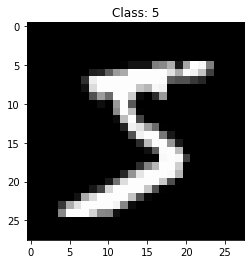

In [4]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class: ' + str(y_train[0]))

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train = X_train.reshape(60000, 28 * 28)
X_train.shape

(60000, 784)

In [7]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
X_test = X_test.reshape(10000, 28 * 28)
X_test.shape

(10000, 784)

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [12]:
X_train /= 255
X_test /= 255

In [13]:
X_train.max()

1.0

In [14]:
X_train.min()

0.0

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
y_train = np_utils.to_categorical(y_train)

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
y_test = np_utils.to_categorical(y_test)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Neural network (training)

In [19]:
(784 + 10) / 2

397.0

In [20]:
# 784 -> 397 -> 397 -> 10
network = Sequential()
network.add(Dense(input_shape = (784,), units = 397, activation = 'relu'))
network.add(Dense(units=397, activation='relu'))
network.add(Dense(units = 10, activation='softmax'))

In [21]:
network.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [22]:
history = network.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.2313 - accuracy: 0.9324
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0852 - accuracy: 0.9737
Epoch 3/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0537 - accuracy: 0.9829
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0399 - accuracy: 0.9871
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0271 - accuracy: 0.9914
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0222 - accuracy: 0.9927
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0206 - accuracy: 0.9931
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0172 - accuracy: 0.9942
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0142 - accuracy: 0.9955
Epoch 10/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0140 - accura

## Neural network (evaluation)

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

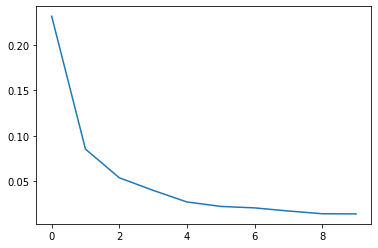

In [24]:
plt.plot(history.history['loss'])

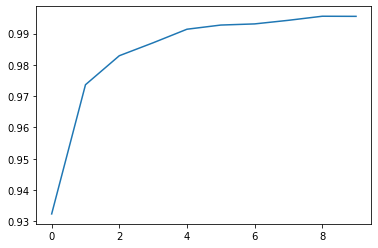

In [25]:
plt.plot(history.history['accuracy'])

In [26]:
accuracy_test = network.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0857 - accuracy: 0.9791


In [27]:
predictions = network.predict(X_test)

In [28]:
predictions[0]

array([1.13460294e-13, 3.66029845e-11, 5.72447978e-10, 1.33254927e-08,
       4.09499041e-13, 1.61047889e-12, 6.55165850e-16, 1.00000000e+00,
       1.39190239e-11, 1.32458666e-09], dtype=float32)

In [29]:
np.argmax(predictions[0])

7

Text(0.5, 1.0, 'Class: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]')

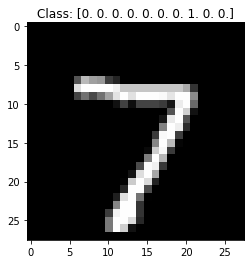

In [30]:
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title('Class: ' + str(y_test[0]))

**Conclusion: Out Neural Network model has correctly classified the number 7. **